# Old Spex SXD Extraction Tutorial

This tutorial shows how to extract the SpeX short cross-dispersing mode (SXD) spectra before the upgrade. <br>
The example data are stored under ```pyspextool/test_data/spex-SXD/```.

## Set up the raw data and output data product paths

First import the ```pyspextool``` package and set up the paths for raw data folder; <br>
the data products, including QA (quality assessment), Cal (calibration), and Proc (processed) here are stored under the raw data subdirectories.

Note that you need to create the associated ```qa/```, ```cal/```, ```proc/``` directories beforehand.

In [1]:
import pyspextool as ps

/Users/chsu/anaconda3/lib/python3.7/site-packages/dask/config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
raw_path = '../data/test_ospex_sxd/'

In [3]:
# This is optional if you want to create the data product paths here:
import os

# qa, cal, proc dirs
product_dirs = [raw_path+'qa/', raw_path+'cal/', raw_path+'proc']

for directory in product_dirs:
    if not os.path.exists(directory):
        os.makedirs(directory)


In [4]:
ps.pyspextool_setup('spex', raw_path=raw_path,
                    qa_path=raw_path+'qa/', cal_path=raw_path+'cal/', proc_path=raw_path+'proc',
                    verbose=True)


Pyspextool Setup
----------------
Instrument:  spex

Rawpath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd
Calpath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd/cal
Procpath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd/proc
Qapath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd/qa

QA Extension: .pdf 



## Flat field

Set up the flat file number and outputed master flat file name and <br>
it will process to produce the master flat file

 
Make Flat Field
---------------
Loading FITS images...
Scaling images...
Medianing the images...
Locating the orders...
Normalizing the median image...
Writing flat to disk...
Flat field flat646-650.fits written to disk.



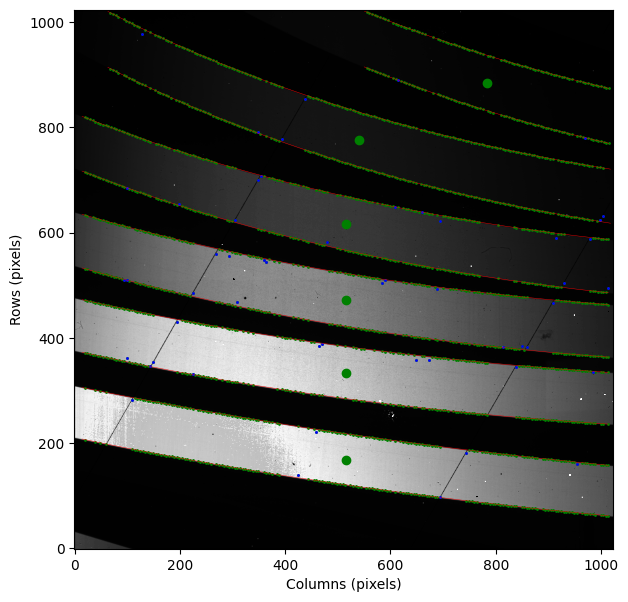

In [5]:
ps.extract.make_flat('646-650','flat646-650',qafile=True,prefix='flat')

## Wavelength calibration

Next is to run the wavelength calibration by setting up (1) file numbers for the arc lamp files to perform wavelength calibration (2) master flat file, (3) output wavecal file.

It uses the cross-correlation to correct for the offset wavelength in the pixel space and solve for the wavelength.

Make Wavecal File
-----------------
Loading FITS images...
Scaling images...
Medianing the images...
Extracting 1 apertures in 6 orders (without background subtraction)...
100% |**********************************************************************|
Finding the lines...
100% |**********************************************************************|
Determining the wavelength solution...
Writing wavecal to disk...
Wavecal wavecal651-653.fits written to disk.



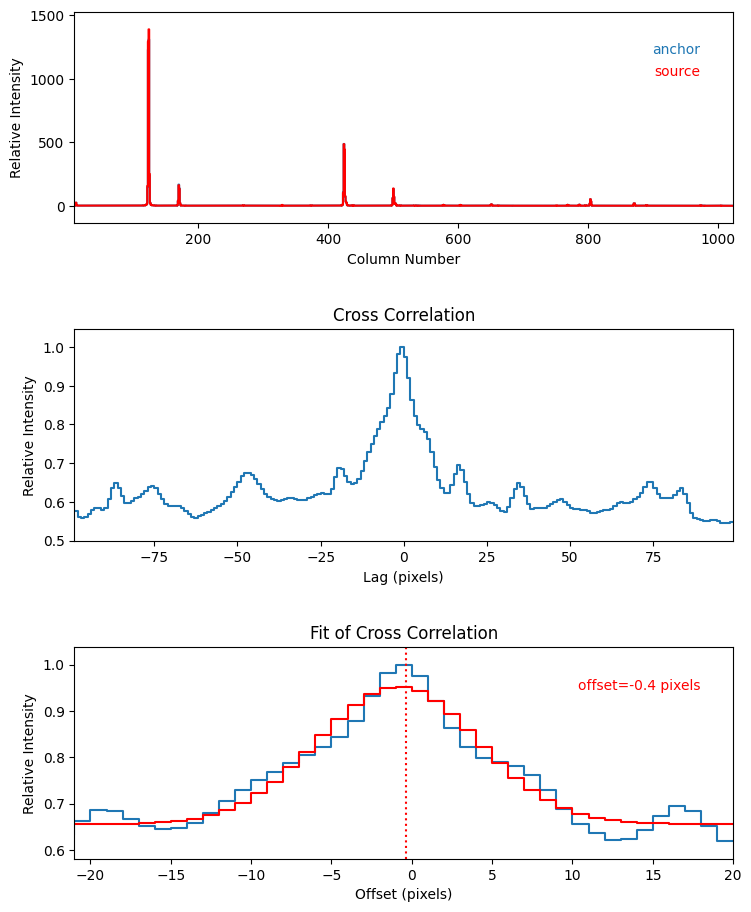

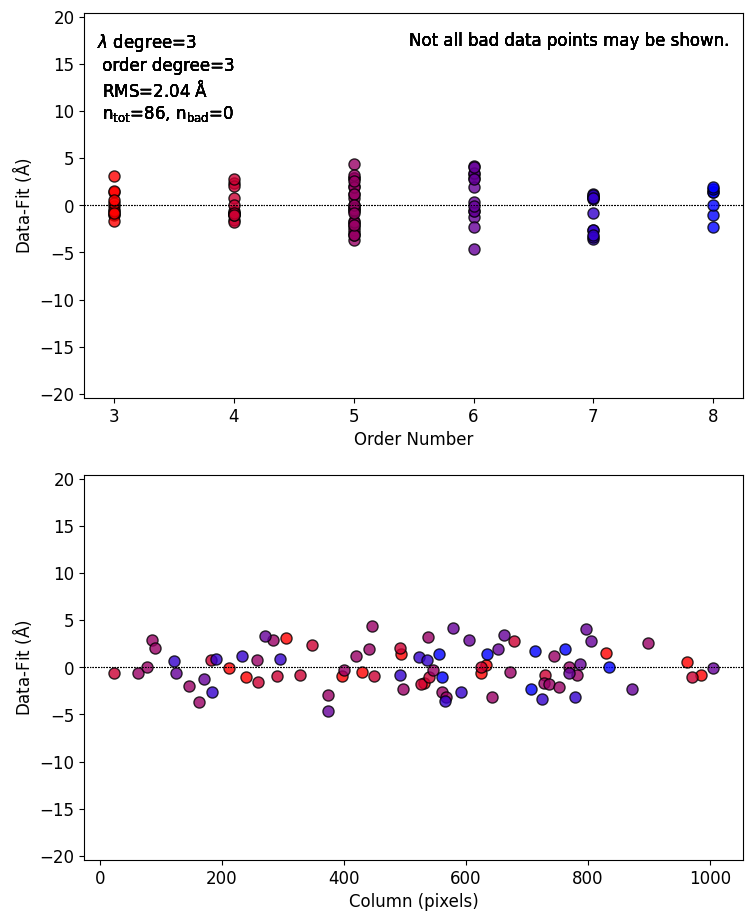

In [6]:
ps.extract.make_wavecal('651-653','flat646-650.fits','wavecal651-653',
                        prefix='arc',
                        qafile_findlines=True,
                        use_stored_solution=False)

# Science Object Extraction (point-source)

To run the science object extraction, you simply set the data folder path up:

In [7]:
ps.pyspextool_setup(instrument='spex',
                    raw_path=raw_path,
                    qa_path=raw_path+'qa/', cal_path=raw_path+'cal/', proc_path=raw_path+'proc/',
                    qaextension='.pdf')


Pyspextool Setup
----------------
Instrument:  spex

Rawpath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd
Calpath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd/cal
Procpath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd/proc
Qapath:  /Users/chsu/ucsd/research/pyspex/data/test_ospex_sxd/qa

QA Extension: .pdf 



To set up the object files, (1) the first argument is a list with a prefix and numbers e.g. ```['spc','626-627']```, (2) then the master flat file, and (3) wavelength solution file.

In [8]:
ps.extract.load_image(['spc','626-627'], 'flat646-650.fits',
                      'wavecal651-653.fits',
                      flat_field=True, linearity_correction=False,
                      qaplot=False, qafile=True, reduction_mode='A-B')

Loading the flat...
Loading the wavecal...
Loading spc0626.a.fits, spc0627.b.fits and not correcting for non-linearity...
Flat fielding the image...


Set the object type to ```ps``` (point-source)

In [9]:
ps.extract.set_extraction_type('ps')

Setting extraction type to point source...


In [10]:
ps.extract.make_spatial_profiles(qaplot=False, qafile=True)

Creating the spatial profiles...


In [11]:
ps.extract.locate_aperture_positions(2, method='auto', qaplot=False,
                                     qafile=True)

Locating the apertures...
Aperture signs are (+, -)...


You can set up the orders e.g. ```4-5``` or ```3-7```. The orders are defined from bottom to top (3 to 8 in the example 2D spectra). Also note that the orders are defined for the configuration in general, so the order number starts from order 3 in our example spectra. You can also check out the ```qa/*_image.pdf``` for this visualization. Since this is a pair-subtraction data reduction, the QA plot is named under the first file, but it also goes with the associated B position in the diagnostic plots.

In [12]:
ps.extract.select_orders(include='3-7', qaplot=False, qafile=True)

Updating order selection...


In [13]:
ps.extract.trace_apertures(qaplot=False, qafile=True)

Tracing apertures...
100% |**********************************************************************|
100% |**********************************************************************|


In [14]:
ps.extract.define_aperture_parameters(1.5, qaplot=False, psf_radius=1.5,
                                      bg_radius=1.6, bg_width=2, qafile=True)

In [15]:
ps.extract.extract_apertures()

Extracting 2 apertures in 5 orders (with background subtraction)...
100% |**********************************************************************|
Wrote spectra0626.fits to disk.
Wrote spectra0627.fits to disk.
 


## These steps can be run with a simpler one-step code once you have run the first iteration

In [16]:
ps.extract.do_all_steps(['spc','628-629'])

Loading spc0628.b.fits, spc0629.a.fits and correcting for non-linearity...
Flat fielding the image...
Creating the spatial profiles...
Locating the apertures...
Aperture signs are (-, +)...
Updating order selection...
Tracing apertures...


/Users/chsu/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


100% |**********************************************************************|
100% |**********************************************************************|
Extracting 2 apertures in 5 orders (with background subtraction)...
100% |**********************************************************************|
Wrote spectra0628.fits to disk.
Wrote spectra0629.fits to disk.
 


# After process, you can check the reduced spectra

The index 0 is wavelength, index 1 is flux, index 2 is noise, index 3 is mask (not implemented yet).

In [17]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [18]:
hdulist = fits.open(raw_path+'proc/spectra0626.fits')

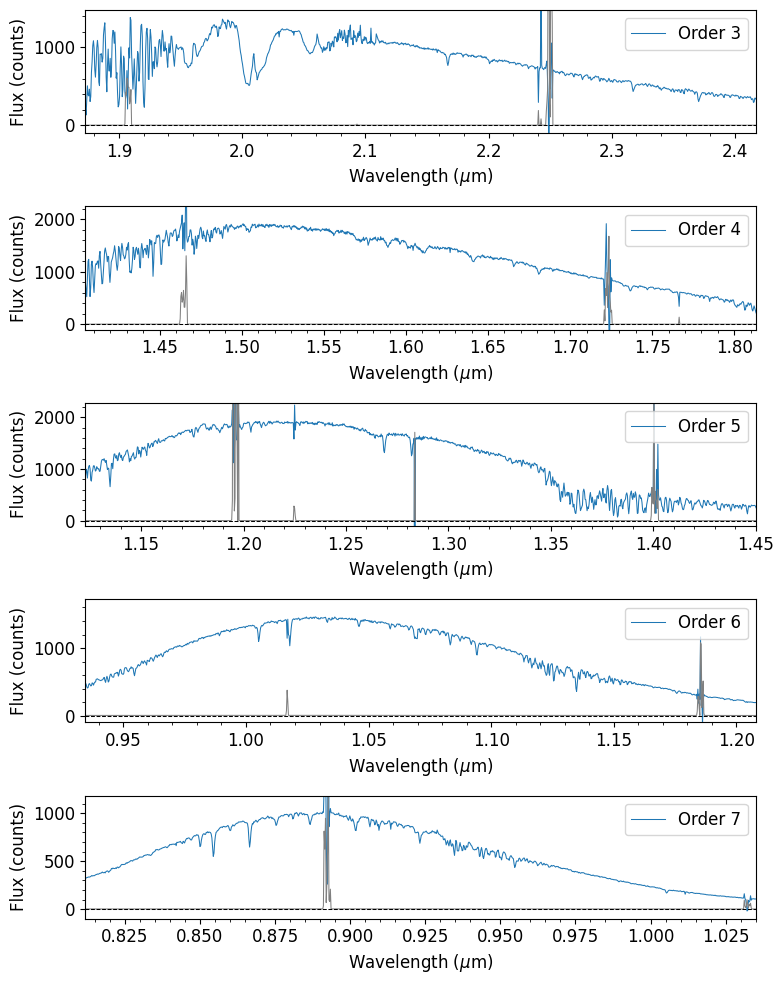

In [19]:
fig, ax = plt.subplots(figsize=(8, 10), nrows=5, ncols=1)
for i in range(5):
    ax[i].plot(hdulist[0].data[i, 0, :], hdulist[0].data[i, 1, :], label=f'Order {i+3}')
    ax[i].plot(hdulist[0].data[i, 0, :], hdulist[0].data[i, 2, :], color='grey')
    ax[i].axhline(y=0, color='k', ls='--')
    # order 7 was cropped at the end
    if i != 4:
        ax[i].set_xlim(hdulist[0].data[i, 0, :][0], hdulist[0].data[i, 0, :][-1])
    else:
        ax[i].set_xlim(hdulist[0].data[i, 0, :][0], hdulist[0].data[i, 0, :][-50])
    ax[i].set_ylim(-100, np.nanpercentile(hdulist[0].data[i, 1, :], 95)*1.2)
    ax[i].set_xlabel('Wavelength ($\mu$m)')
    ax[i].set_ylabel('Flux (counts)')
    ax[i].minorticks_on()
    ax[i].legend(loc=1)
plt.tight_layout()
plt.show()